In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpt
import seaborn as sns

In [2]:
print(pd.__version__)

1.4.2


In [3]:
print(np.__version__)

1.21.5


In [4]:
print(sns.__version__)

0.11.2


In [5]:
dp = pd.read_csv(r'C:\Users\sukhanth royal\Pictures\Desktop\50_Startups.csv')

In [6]:
dp.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
dp.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
#checking for the null values or is there any different Dtype in numerical columns
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

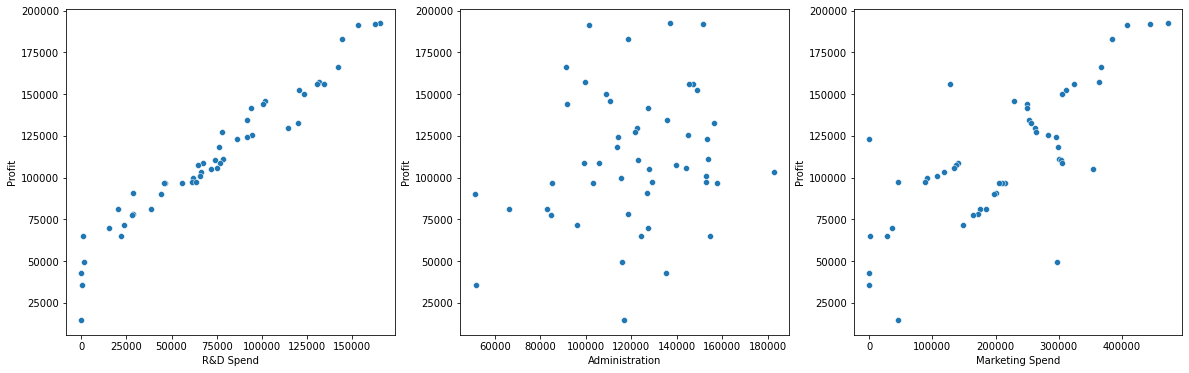

In [9]:
mpt.figure(figsize = (20,6))
mpt.subplot(1,3,1)
sns.scatterplot(x = 'R&D Spend', y = 'Profit' , data = dp)
mpt.subplot(1,3,2)
sns.scatterplot(x = 'Administration', y = 'Profit' , data = dp)
mpt.subplot(1,3,3)
sns.scatterplot(x = 'Marketing Spend', y = 'Profit' , data = dp)

<AxesSubplot:>

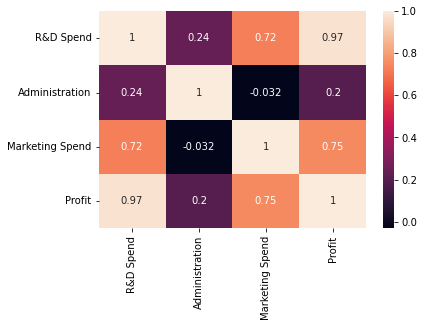

In [10]:
sns.heatmap(dp.corr(),annot = True)

In [11]:
#it was clearly visible that profit was more dependent on R&D Spend & Marketing Spend 

In [12]:
dp.corr()['Profit']

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

In [13]:
X = dp.drop('Profit',axis = 1)
y = dp['Profit']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state= 108)

In [15]:
from sklearn.linear_model import LinearRegression
sk = LinearRegression()
sk.fit(X_train,y_train)

LinearRegression()

In [16]:
sk_pred = sk.predict(X_test)
sk_pred

array([ 50085.9437028 ,  98578.81992515, 162669.97329873, 126977.7875282 ,
        61699.63637568,  88947.21853807, 116505.92589374, 190111.70248995,
       114102.20761924, 135368.86957248,  48244.33466045,  75755.3985128 ,
        57010.28398483, 100327.52224079,  75972.12541896])

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,sk_pred)
mse = mean_squared_error(y_test,sk_pred)
rmse = np.sqrt(mse)

In [18]:
print(mae)
print(mse)
print(rmse)

7818.260740140117
129014309.14238653
11358.446599002284


Text(0, 0.5, 'residual')

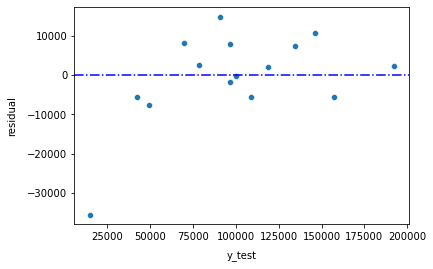

In [19]:
residual = y_test - sk_pred
sns.scatterplot(x = y_test ,y = residual)
mpt.axhline(y = 0, color = 'b', linestyle = "-.")
mpt.xlabel('y_test',labelpad = 10 , loc = 'center')
mpt.ylabel('residual',labelpad = 10, loc = 'center')


In [20]:
#Here if we observe that linear_model wasn't performing well and it was clear from the error metrics and from the above graph
#so i will convert to the some high degree polynomial 

In [21]:
from sklearn.preprocessing import PolynomialFeatures
Pf = PolynomialFeatures(degree = 2, include_bias = False)
Pf.fit(X)
X = Pf.transform(X)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state= 108)

In [23]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(X_train,y_train)
test_predictions = my_model.predict(X_test)

In [24]:
mae = mean_absolute_error(y_test, test_predictions )
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)

In [25]:
print(mae)
print(rmse)
print(mse)

9755.431951481287
14172.988652976412
200873607.35739812


In [26]:
#Here if we observe that error was increasing so polynomial degree of 1 is suitable

In [27]:
Total_train_rmse_errors = []
Total_test_rmse_errors = []
for d in range(1,10):
    
    pc = PolynomialFeatures(degree = d ,include_bias= False )
    obtained_p = pc.fit_transform(X)
    
    
    X_train, X_test, y_train, y_test = train_test_split(obtained_p, y, test_size=0.3, random_state= 108)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    poly_test_pred = poly_model.predict(X_test)
    poly_train_pred = poly_model.predict(X_train)
    
    p_test_rmse = np.sqrt(mean_squared_error(y_test,poly_test_pred))
    
    p_train_rmse = np.sqrt(mean_squared_error(y_train, poly_train_pred))
    
    Total_train_rmse_errors.append(p_train_rmse)
    Total_test_rmse_errors.append(p_test_rmse)
    
print(Total_train_rmse_errors)
print(Total_test_rmse_errors)

[6314.21565295676, 1894.3162323269785, 5.8408109943761046e-06, 1.566164423082981e-05, 4.396364505516021e-05, 0.0004087927563219101, 0.04527150062352893, 3.061945500629345, 1.2600302218046342]
[14172.988652976412, 515296.49404147896, 26635198.087614745, 29801749.75120757, 101098233.48140633, 373156936.30053276, 2562913297.280482, 17101699347.354853, 103439011024.8961]


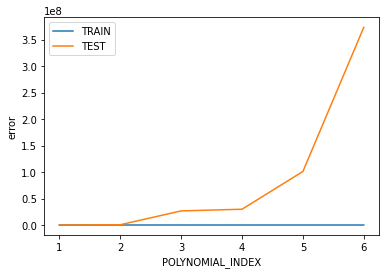

In [28]:
mpt.plot(range(1,7),Total_train_rmse_errors[:6],label = 'TRAIN')
mpt.plot(range(1,7),Total_test_rmse_errors[:6],label = 'TEST')
mpt.xlabel("POLYNOMIAL_INDEX")
mpt.ylabel("error")
mpt.legend()

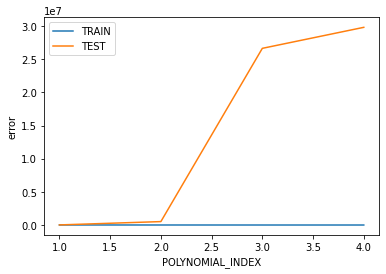

In [29]:
mpt.plot(range(1,5),Total_train_rmse_errors[:4],label = 'TRAIN')
mpt.plot(range(1,5),Total_test_rmse_errors[:4],label = 'TEST')
mpt.xlabel("POLYNOMIAL_INDEX")
mpt.ylabel("error")
mpt.legend()

In [30]:
#from figure i conclude that polynomial degree 1 was the best one for linear regression

# Lasso,Ridge,ElasticNet

In [31]:
#here i will use cv for lasso, ridge,elasticnet
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import RidgeCV
rcv  = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring = 'neg_mean_absolute_error')
rcv.fit(X_train,y_train)
prtd = rcv.predict(X_test)
rcv.alpha_

10.0

In [32]:
MAE = mean_absolute_error(y_test,prtd)
MSE = mean_squared_error(y_test,prtd)
RMSE = np.sqrt(MSE)

In [33]:
RMSE

17089.765929158773

In [34]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(eps=0.01,n_alphas=100,max_iter =100000)
lcv.fit(X_train,y_train)
pdt = lcv.predict(X_test)
MAE1 = mean_absolute_error(y_test,pdt)
MSE1 = mean_squared_error(y_test,pdt)
RMSE1 = np.sqrt(MSE1)
print(MAE1)
print(MSE1)
print(RMSE1)

8799.884733897883
162812173.97561026
12759.78737971798


In [35]:
from sklearn.linear_model import ElasticNetCV
ecv = ElasticNetCV(l1_ratio = [.1, .5, 1] ,eps=0.1 , n_alphas = 100, max_iter = 100000)
ecv.fit(X_train,y_train)
epdt = ecv.predict(X_test)

In [36]:
ecv.l1_ratio_

1.0

In [37]:
MAE2 = mean_absolute_error(y_test,epdt)
MSE2 = mean_squared_error(y_test,epdt)
RMSE2 = np.sqrt(MSE2)

In [38]:
print(MAE2)
print(MSE2)
print(RMSE2)

8829.45721020832
198070810.57657018
14073.763198823908


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=108)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
base_model = SVR()
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}
svr = SVR()
grid_model = GridSearchCV(svr,param_grid)
grid_model.fit(scaled_X_train,y_train)
base_preds = grid_model.predict(scaled_X_test)

In [80]:
np.sqrt(mean_squared_error(y_test,base_preds))

45878.960350516216

In [83]:
from sklearn.tree import DecisionTreeRegressor
Dmodel = DecisionTreeRegressor(max_depth= 7)
Dmodel.fit(X_train,y_train)
preds = Dmodel.predict(X_test)    
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)

17297.09323568833


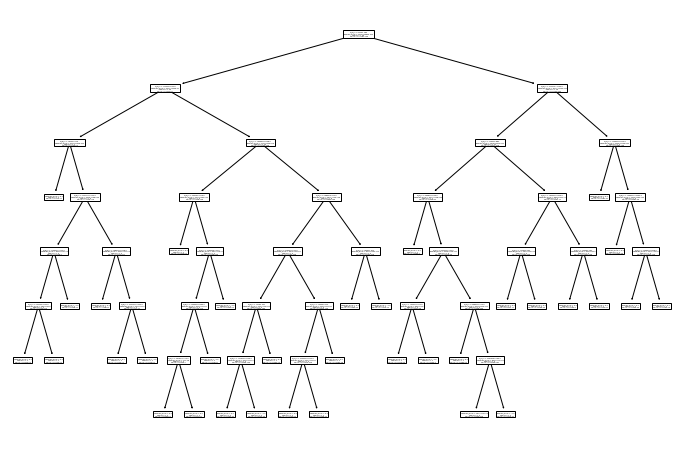

In [84]:
from sklearn.tree import plot_tree
mpt.figure(figsize=(12,8))
plot_tree(Dmodel);

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
Gmodel = DecisionTreeRegressor()
Gmodel.fit(X_train,y_train)
preds = Gmodel.predict(X_test)    
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)

17480.353126708473


In [77]:
from sklearn.ensemble import RandomForestRegressor
Rmodel = RandomForestRegressor(n_estimators = 5)
Rmodel.fit(X_train,y_train)
preds = Rmodel.predict(X_test)    
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)

16857.82684074317


In [78]:
from sklearn.ensemble import AdaBoostRegressor
Amodel = AdaBoostRegressor()
Amodel.fit(X_train,y_train)
preds = Amodel.predict(X_test)    
rmse = np.sqrt(mean_squared_error(y_test,preds))
print(rmse)

15260.112296203117
